# Classify the size categorie using SVM


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split


In [2]:
# remove warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the data

forestfires = pd.read_csv("forestfires.csv")
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Data Description:

month: month of the year: 'jan' to 'dec'

day: day of the week: 'mon' to 'sun'

FFMC: FFMC index from the FWI system: 18.7 to 96.20

DMC: DMC index from the FWI system: 1.1 to 291.3

DC: DC index from the FWI system: 7.9 to 860.6

ISI: ISI index from the FWI system: 0.0 to 56.10

temp: temperature in Celsius degrees: 2.2 to 33.30

RH: relative humidity in %: 15.0 to 100

wind: wind speed in km/h: 0.40 to 9.40

rain: outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie: the burned area of the forest ( Small , Large)


In [4]:
# Display the first 5 rows

forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
# Display the last 5 rows

forestfires.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [6]:
# information about the data

forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
# Statistical information of the data

forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Number of rows and columns

forestfires.shape

(517, 31)

In [9]:
# number of columns

forestfires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
# missing values

forestfires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
# Skewness of the data

forestfires.skew()

FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
rain        19.816344
area        12.846934
dayfri       1.816105
daymon       2.043956
daysat       1.835290
daysun       1.637920
daythu       2.375268
daytue       2.291255
daywed       2.594172
monthapr     7.401340
monthaug     0.603696
monthdec     7.401340
monthfeb     4.798308
monthjan    16.031038
monthjul     3.646828
monthjun     5.254127
monthmar     2.594172
monthmay    16.031038
monthnov    22.737634
monthoct     5.628522
monthsep     0.712255
dtype: float64

In [12]:
# Kurtosis of the data

forestfires.kurt()

FFMC         67.066041
DMC           0.204822
DC           -0.245244
ISI          21.458037
temp          0.136166
RH            0.438183
wind          0.054324
rain        421.295964
area        194.140721
dayfri        1.303265
daymon        2.186198
daysat        1.373589
daysun        0.685418
daythu        3.656027
daytue        3.262455
daywed        4.748083
monthapr     52.984784
monthaug     -1.641918
monthdec     52.984784
monthfeb     21.105386
monthjan    255.984443
monthjul     11.343218
monthjun     25.705276
monthmar      4.748083
monthmay    255.984443
monthnov    517.000000
monthoct     29.795509
monthsep     -1.498505
dtype: float64

In [13]:
# Correlation

forestfires.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


# EDA

In [14]:
pd.set_option("display.max_columns",31)
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [15]:
y_count = forestfires.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


In [16]:
y_count

,size_category,counts
0,small,378
1,large,139


In [18]:
month_forestfires = forestfires.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_forestfires.head(5)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42


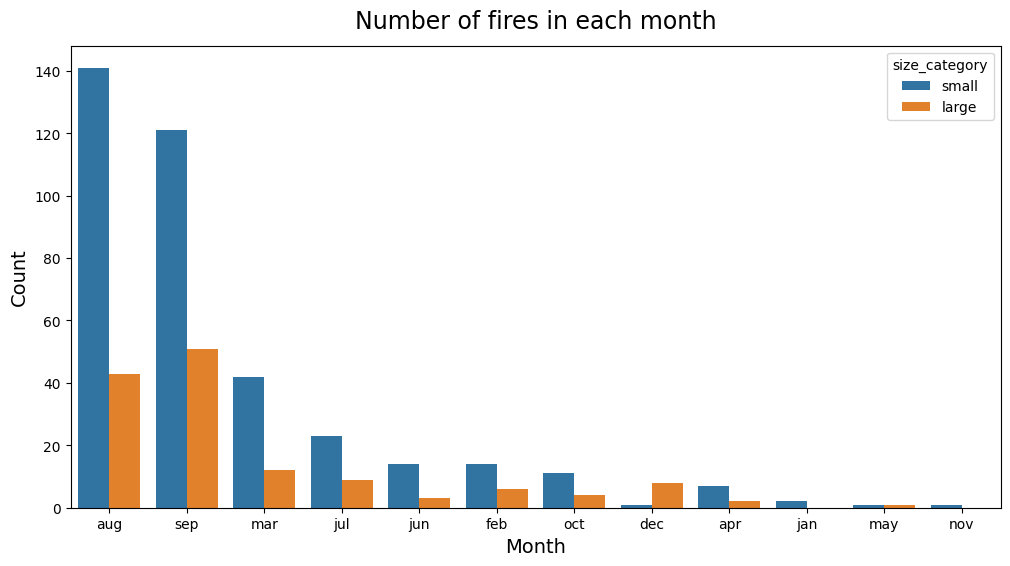

In [23]:
# Barplot

plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_forestfires)
plt.title("Number of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [20]:
day_forestfires = forestfires.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_forestfires

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


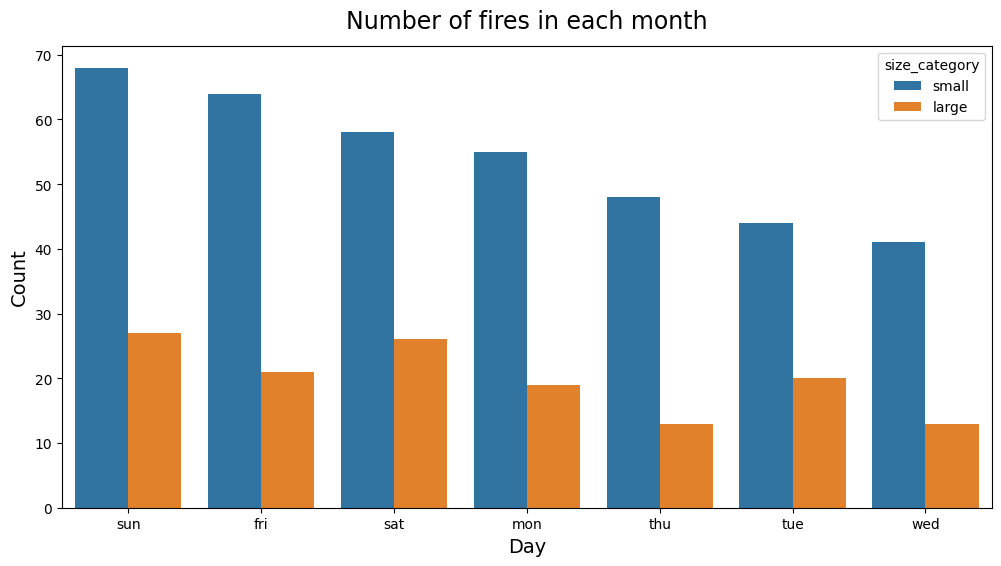

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_forestfires)
plt.title("Number of fires on each day", fontsize=17, y=1.02)
plt.title("Number of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [24]:
# 1 for small
# 0 for large

labelencoder = LabelEncoder()
forestfires.iloc[:,-1] = labelencoder.fit_transform(forestfires.iloc[:,-1])
forestfires['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [25]:
rain_forestfires = forestfires.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_forestfires

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


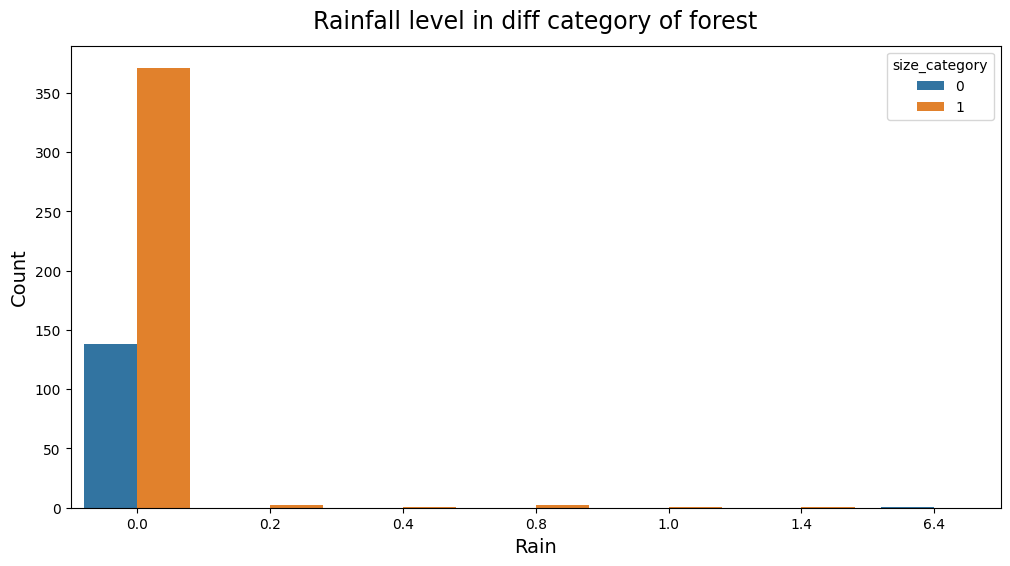

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='rain', y='count', hue='size_category', data= rain_forestfires)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

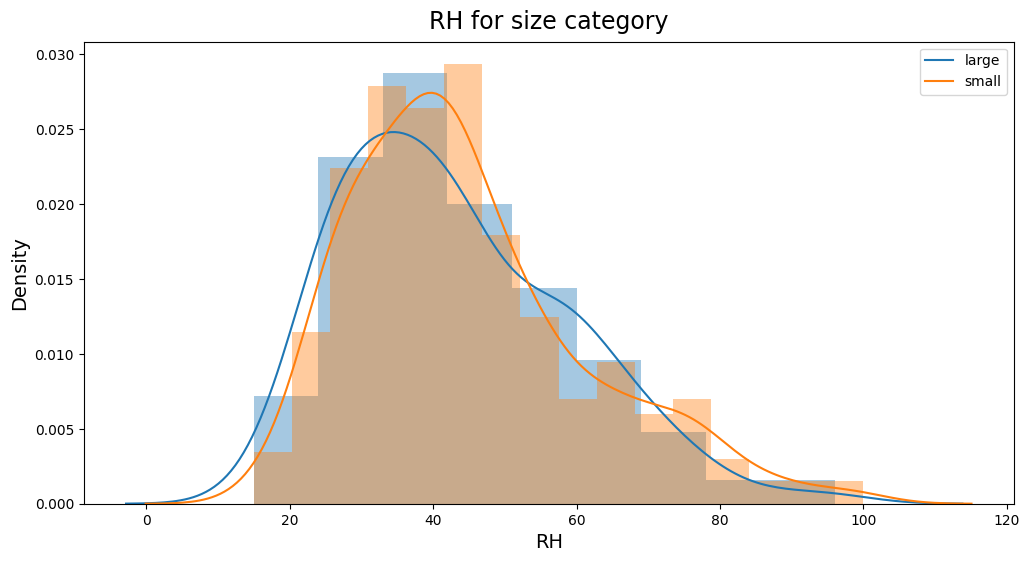

In [27]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['RH'])
sns.distplot(forestfires[forestfires['size_category']==1]['RH'])
plt.title("RH for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('RH', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

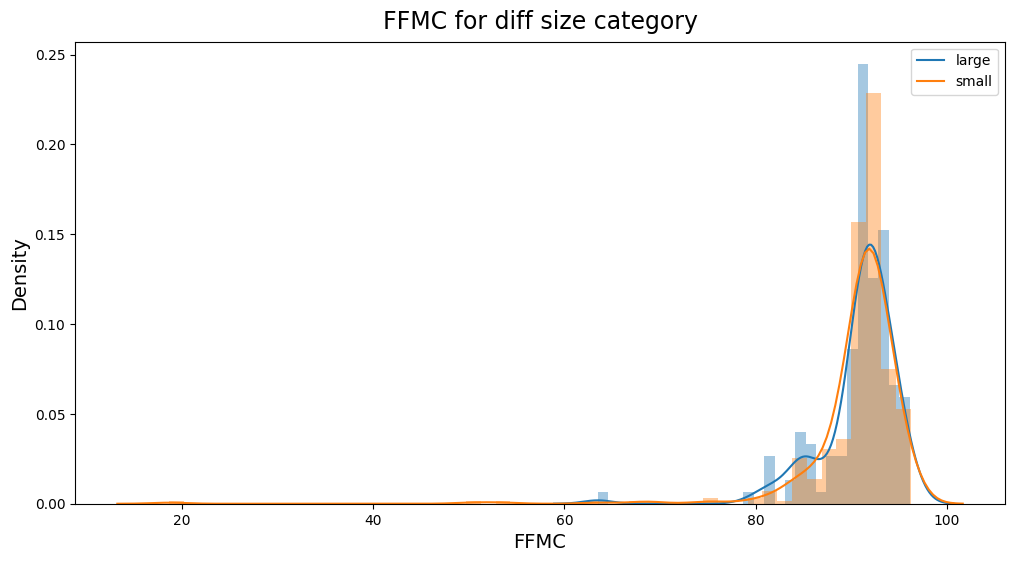

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['FFMC'])
sns.distplot(forestfires[forestfires['size_category']==1]['FFMC'])
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('FFMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

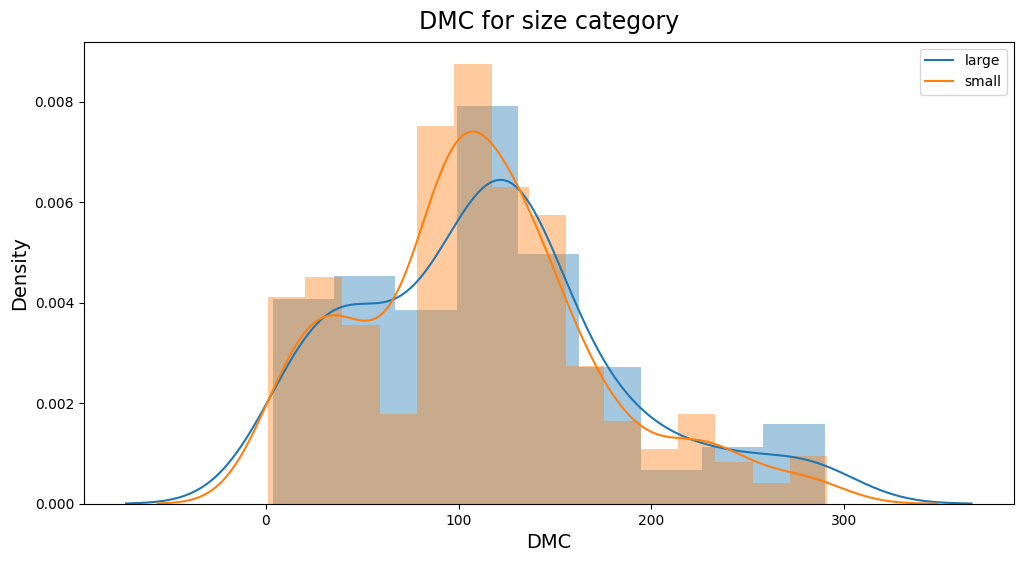

In [29]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['DMC'])
sns.distplot(forestfires[forestfires['size_category']==1]['DMC'])
plt.title("DMC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

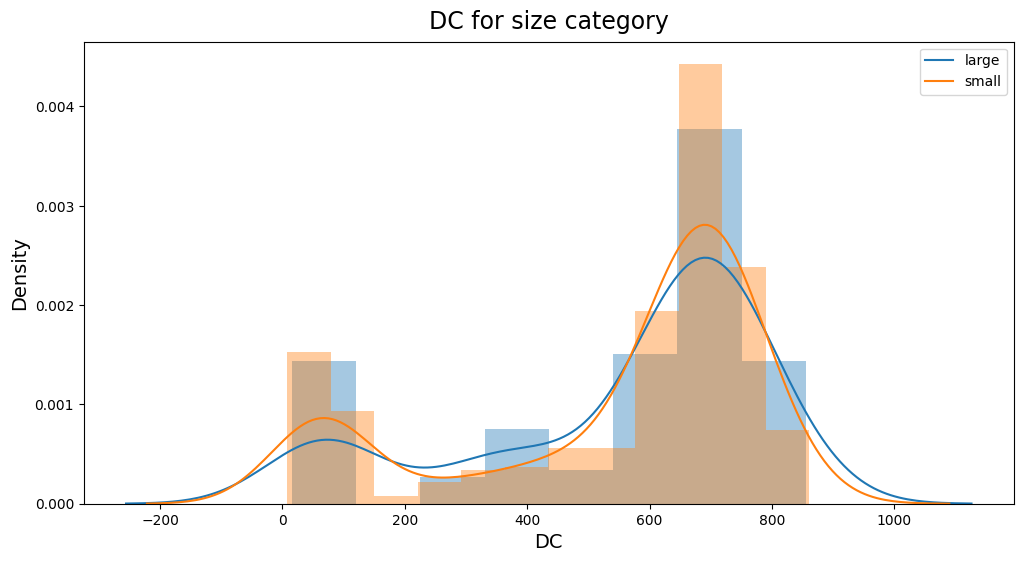

In [30]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['DC'])
sns.distplot(forestfires[forestfires['size_category']==1]['DC'])
plt.title("DC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

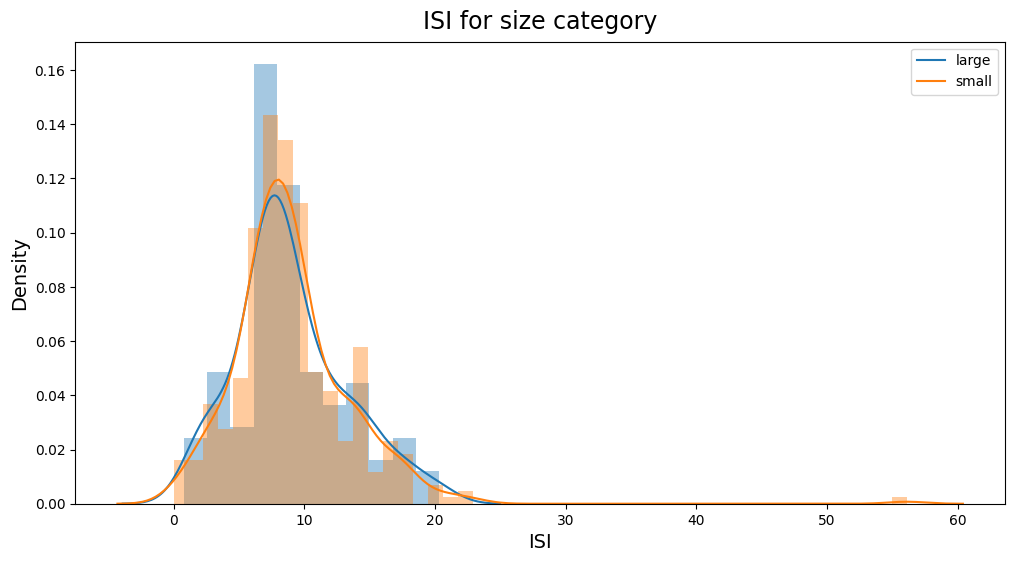

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['ISI'])
sns.distplot(forestfires[forestfires['size_category']==1]['ISI'])
plt.title("ISI for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('ISI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

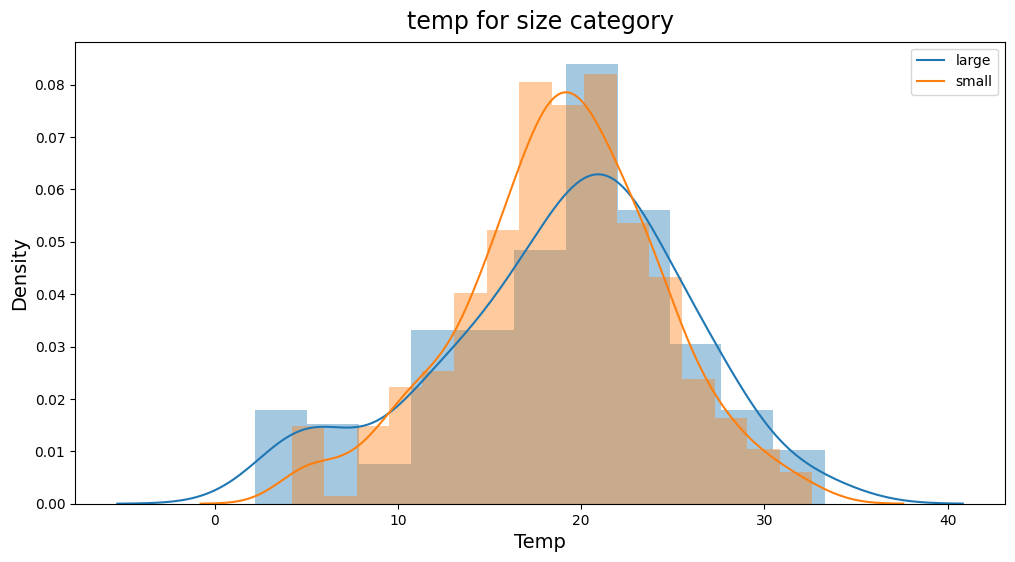

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['temp'])
sns.distplot(forestfires[forestfires['size_category']==1]['temp'])
plt.title("temp for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Temp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

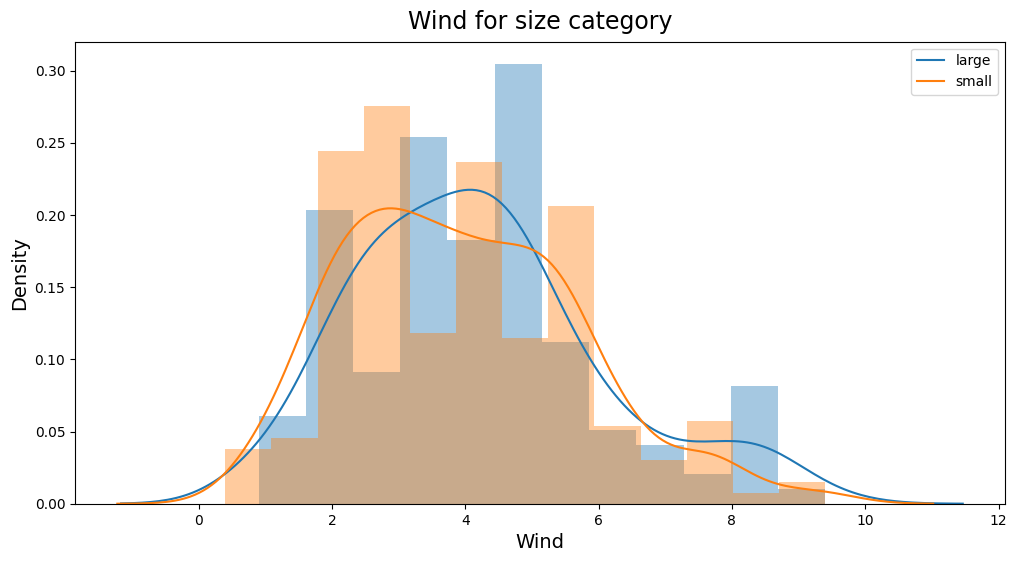

In [33]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['wind'])
sns.distplot(forestfires[forestfires['size_category']==1]['wind'])
plt.title("Wind for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

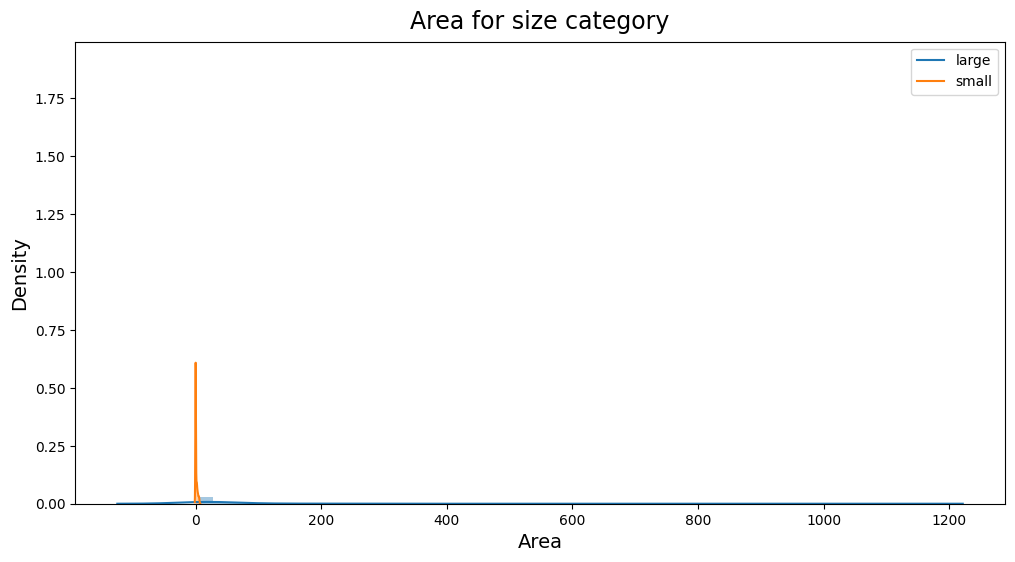

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['area'])
sns.distplot(forestfires[forestfires['size_category']==1]['area'])
plt.title("Area for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Area', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Dectecting Outliers

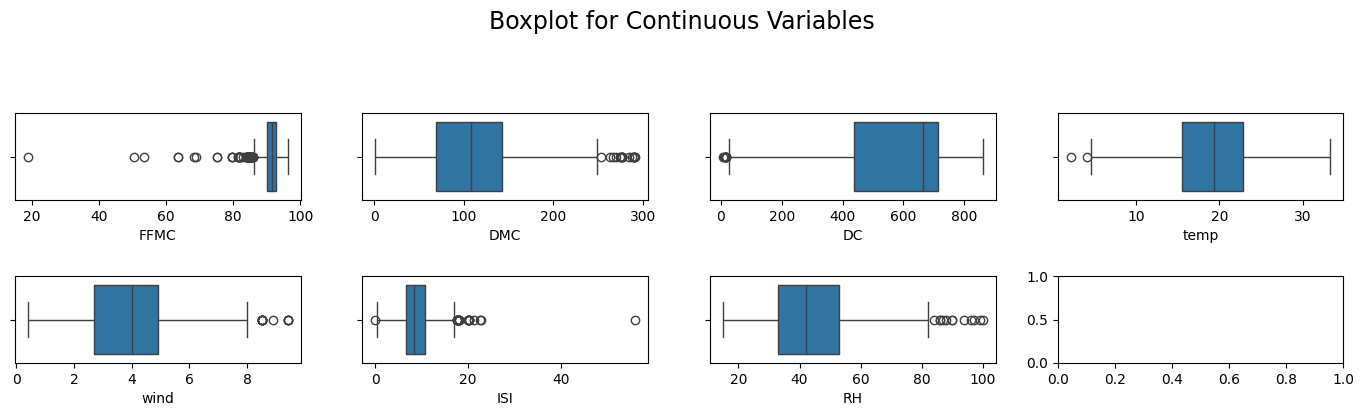

In [35]:
fig,ax=plt.subplots(2,4,figsize=(14,4),sharex=False,sharey=False)
sns.boxplot(forestfires.FFMC,ax=ax[0,0],orient="h")
sns.boxplot(forestfires.DMC,ax=ax[0,1],orient="h")
sns.boxplot(forestfires.DC,ax=ax[0,2],orient="h")
sns.boxplot(forestfires.temp,ax=ax[0,3],orient="h")
sns.boxplot(forestfires.wind,ax=ax[1,0],orient="h")
sns.boxplot(forestfires.ISI,ax=ax[1,1],orient="h")
sns.boxplot(forestfires.RH,ax=ax[1,2],orient="h")
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


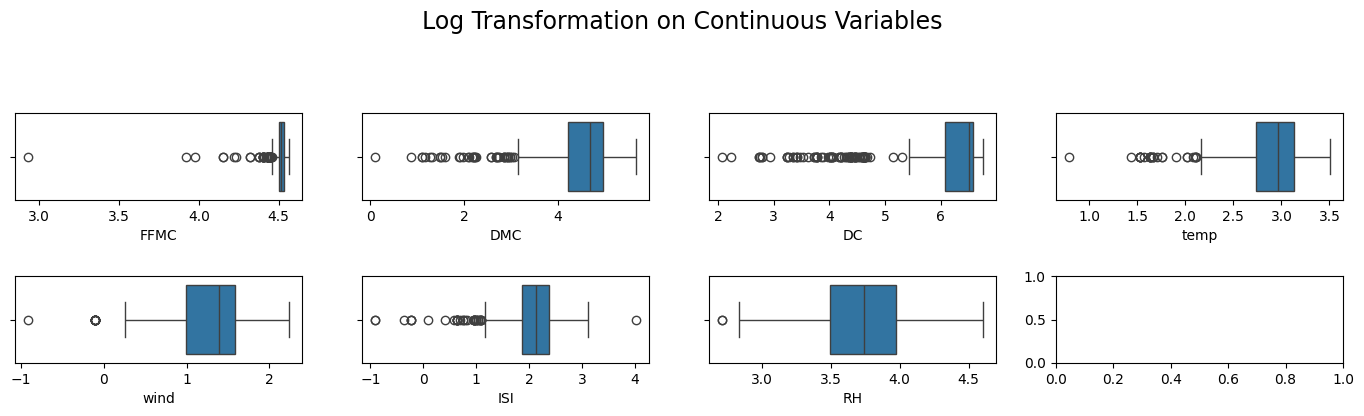

In [36]:
# Let try to treat our outliers by log tranformations

fig,ax=plt.subplots(2,4,figsize=(14,4),sharex=False,sharey=False)
sns.boxplot(np.log(forestfires.FFMC),ax=ax[0,0],orient="h")
sns.boxplot(np.log(forestfires.DMC),ax=ax[0,1],orient="h")
sns.boxplot(np.log(forestfires.DC),ax=ax[0,2],orient="h")
sns.boxplot(np.log(forestfires.temp),ax=ax[0,3],orient="h")
sns.boxplot(np.log(forestfires.wind),ax=ax[1,0],orient="h")
sns.boxplot(np.log(forestfires.ISI),ax=ax[1,1],orient="h")
sns.boxplot(np.log(forestfires.RH),ax=ax[1,2],orient="h")
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

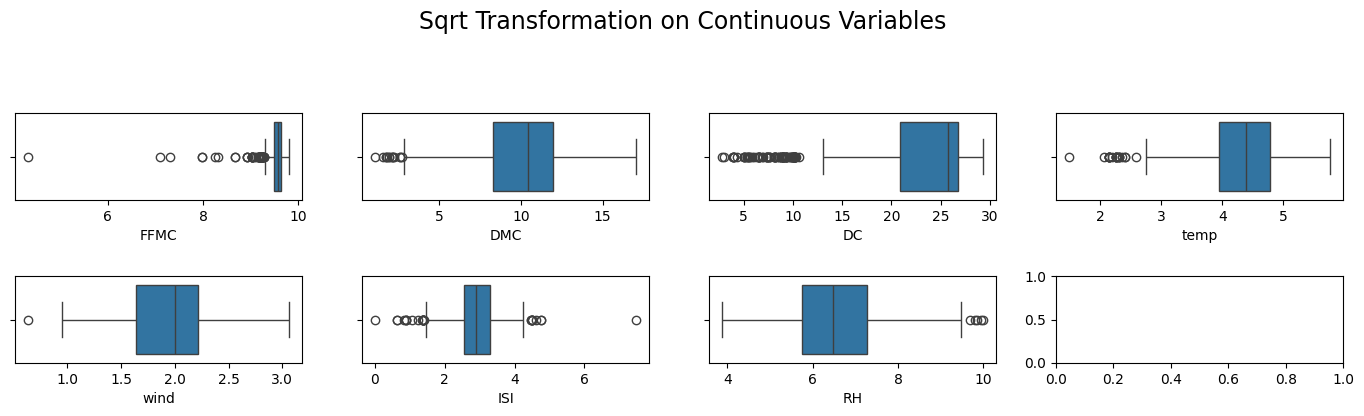

In [37]:
# Let try to treat our outliers by sqrt tranformations

fig,ax=plt.subplots(2,4,figsize=(14,4),sharex=False,sharey=False)
sns.boxplot(np.sqrt(forestfires.FFMC),ax=ax[0,0],orient="h")
sns.boxplot(np.sqrt(forestfires.DMC),ax=ax[0,1],orient="h")
sns.boxplot(np.sqrt(forestfires.DC),ax=ax[0,2],orient="h")
sns.boxplot(np.sqrt(forestfires.temp),ax=ax[0,3],orient="h")
sns.boxplot(np.sqrt(forestfires.wind),ax=ax[1,0],orient="h")
sns.boxplot(np.sqrt(forestfires.ISI),ax=ax[1,1],orient="h")
sns.boxplot(np.sqrt(forestfires.RH),ax=ax[1,2],orient="h")
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


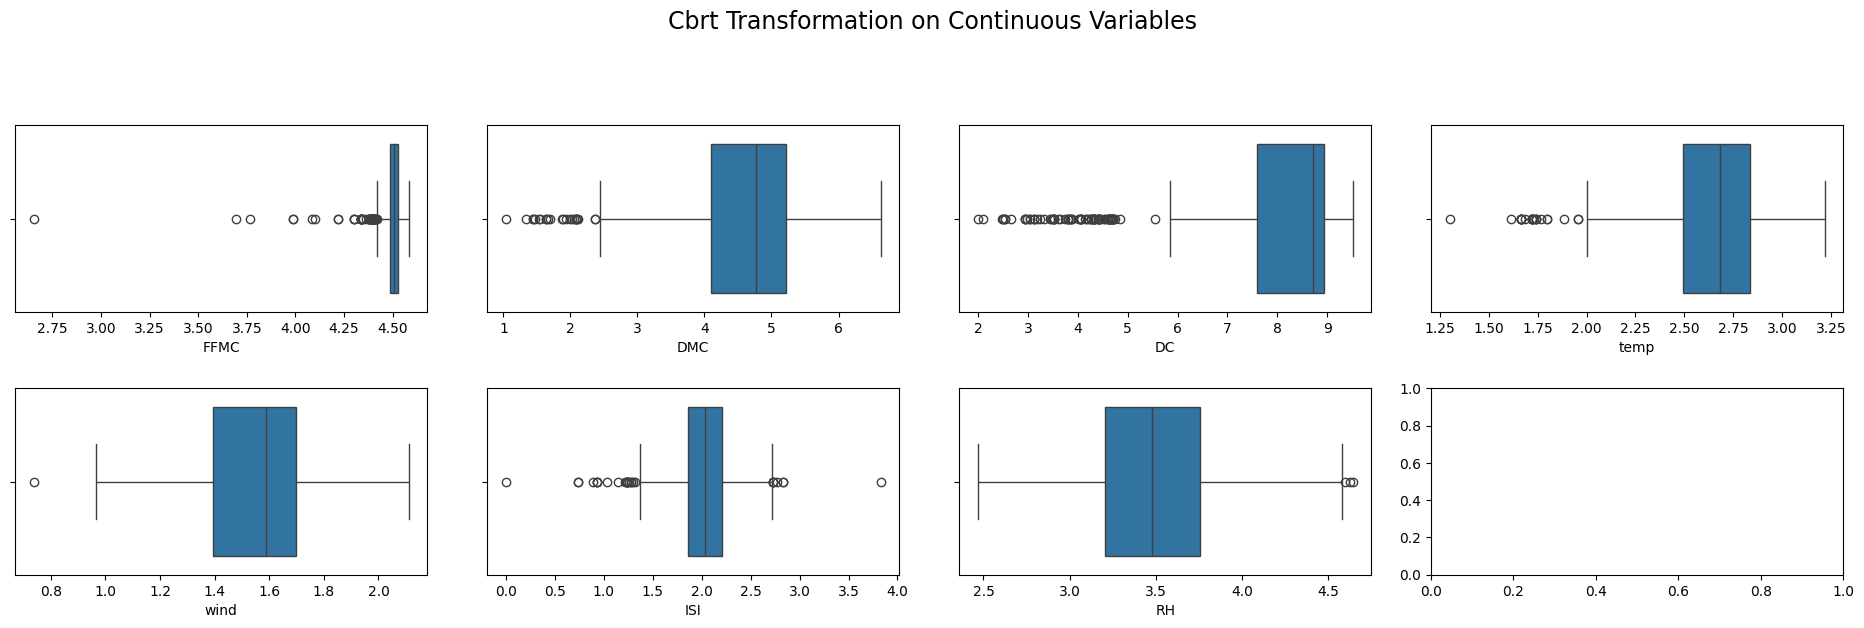

In [38]:
# Let try to treat our outliers by cbrt tranformations

fig,ax=plt.subplots(2,4,figsize=(19,6),sharex=False,sharey=False)
sns.boxplot(np.cbrt(forestfires.FFMC),ax=ax[0,0],orient="h")
sns.boxplot(np.cbrt(forestfires.DMC),ax=ax[0,1],orient="h")
sns.boxplot(np.cbrt(forestfires.DC),ax=ax[0,2],orient="h")
sns.boxplot(np.cbrt(forestfires.temp),ax=ax[0,3],orient="h")
sns.boxplot(np.cbrt(forestfires.wind),ax=ax[1,0],orient="h")
sns.boxplot(np.cbrt(forestfires.ISI),ax=ax[1,1],orient="h")
sns.boxplot(np.cbrt(forestfires.RH),ax=ax[1,2],orient="h")
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [39]:
# Dependency of Target variable on diff Features

forestfires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [40]:
# To get correlation of target variable with numerical columns

df1 = forestfires.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)


In [41]:
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [42]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


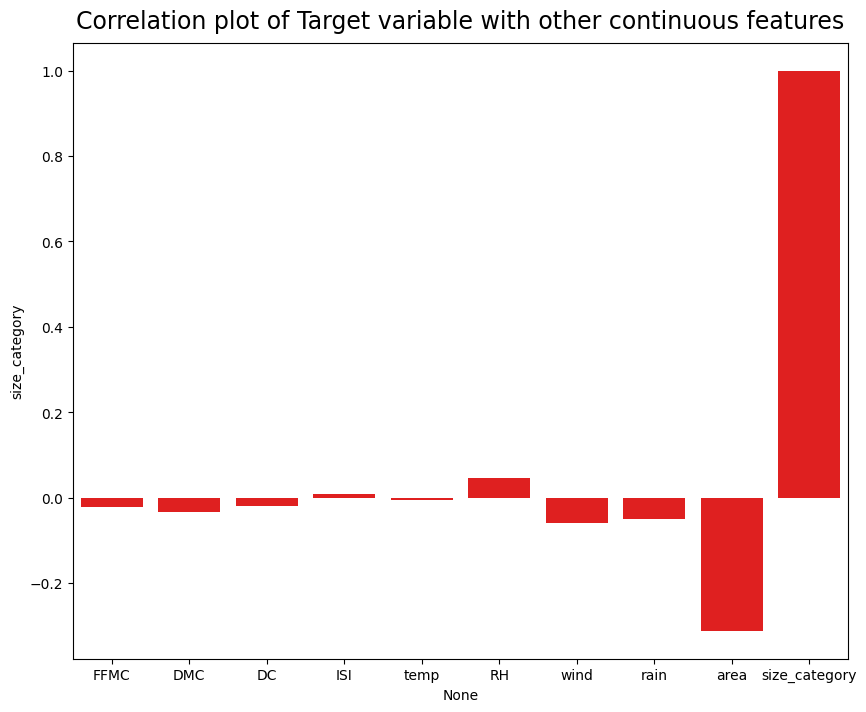

In [43]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x=corr.index,y=corr.iloc[:,0],color="red")
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)
plt.show()

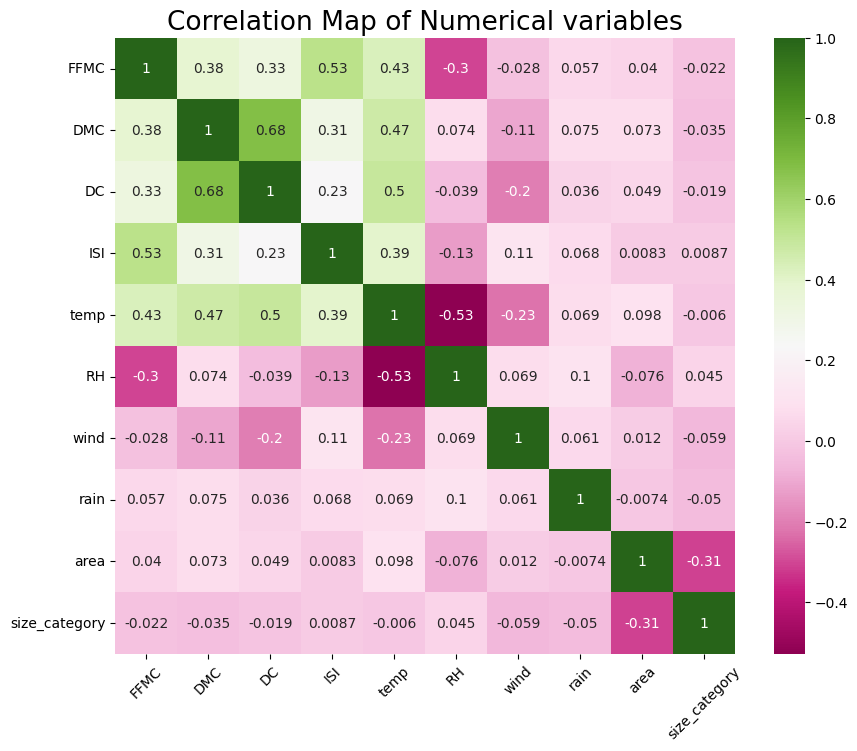

In [44]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,cmap="PiYG");
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19);


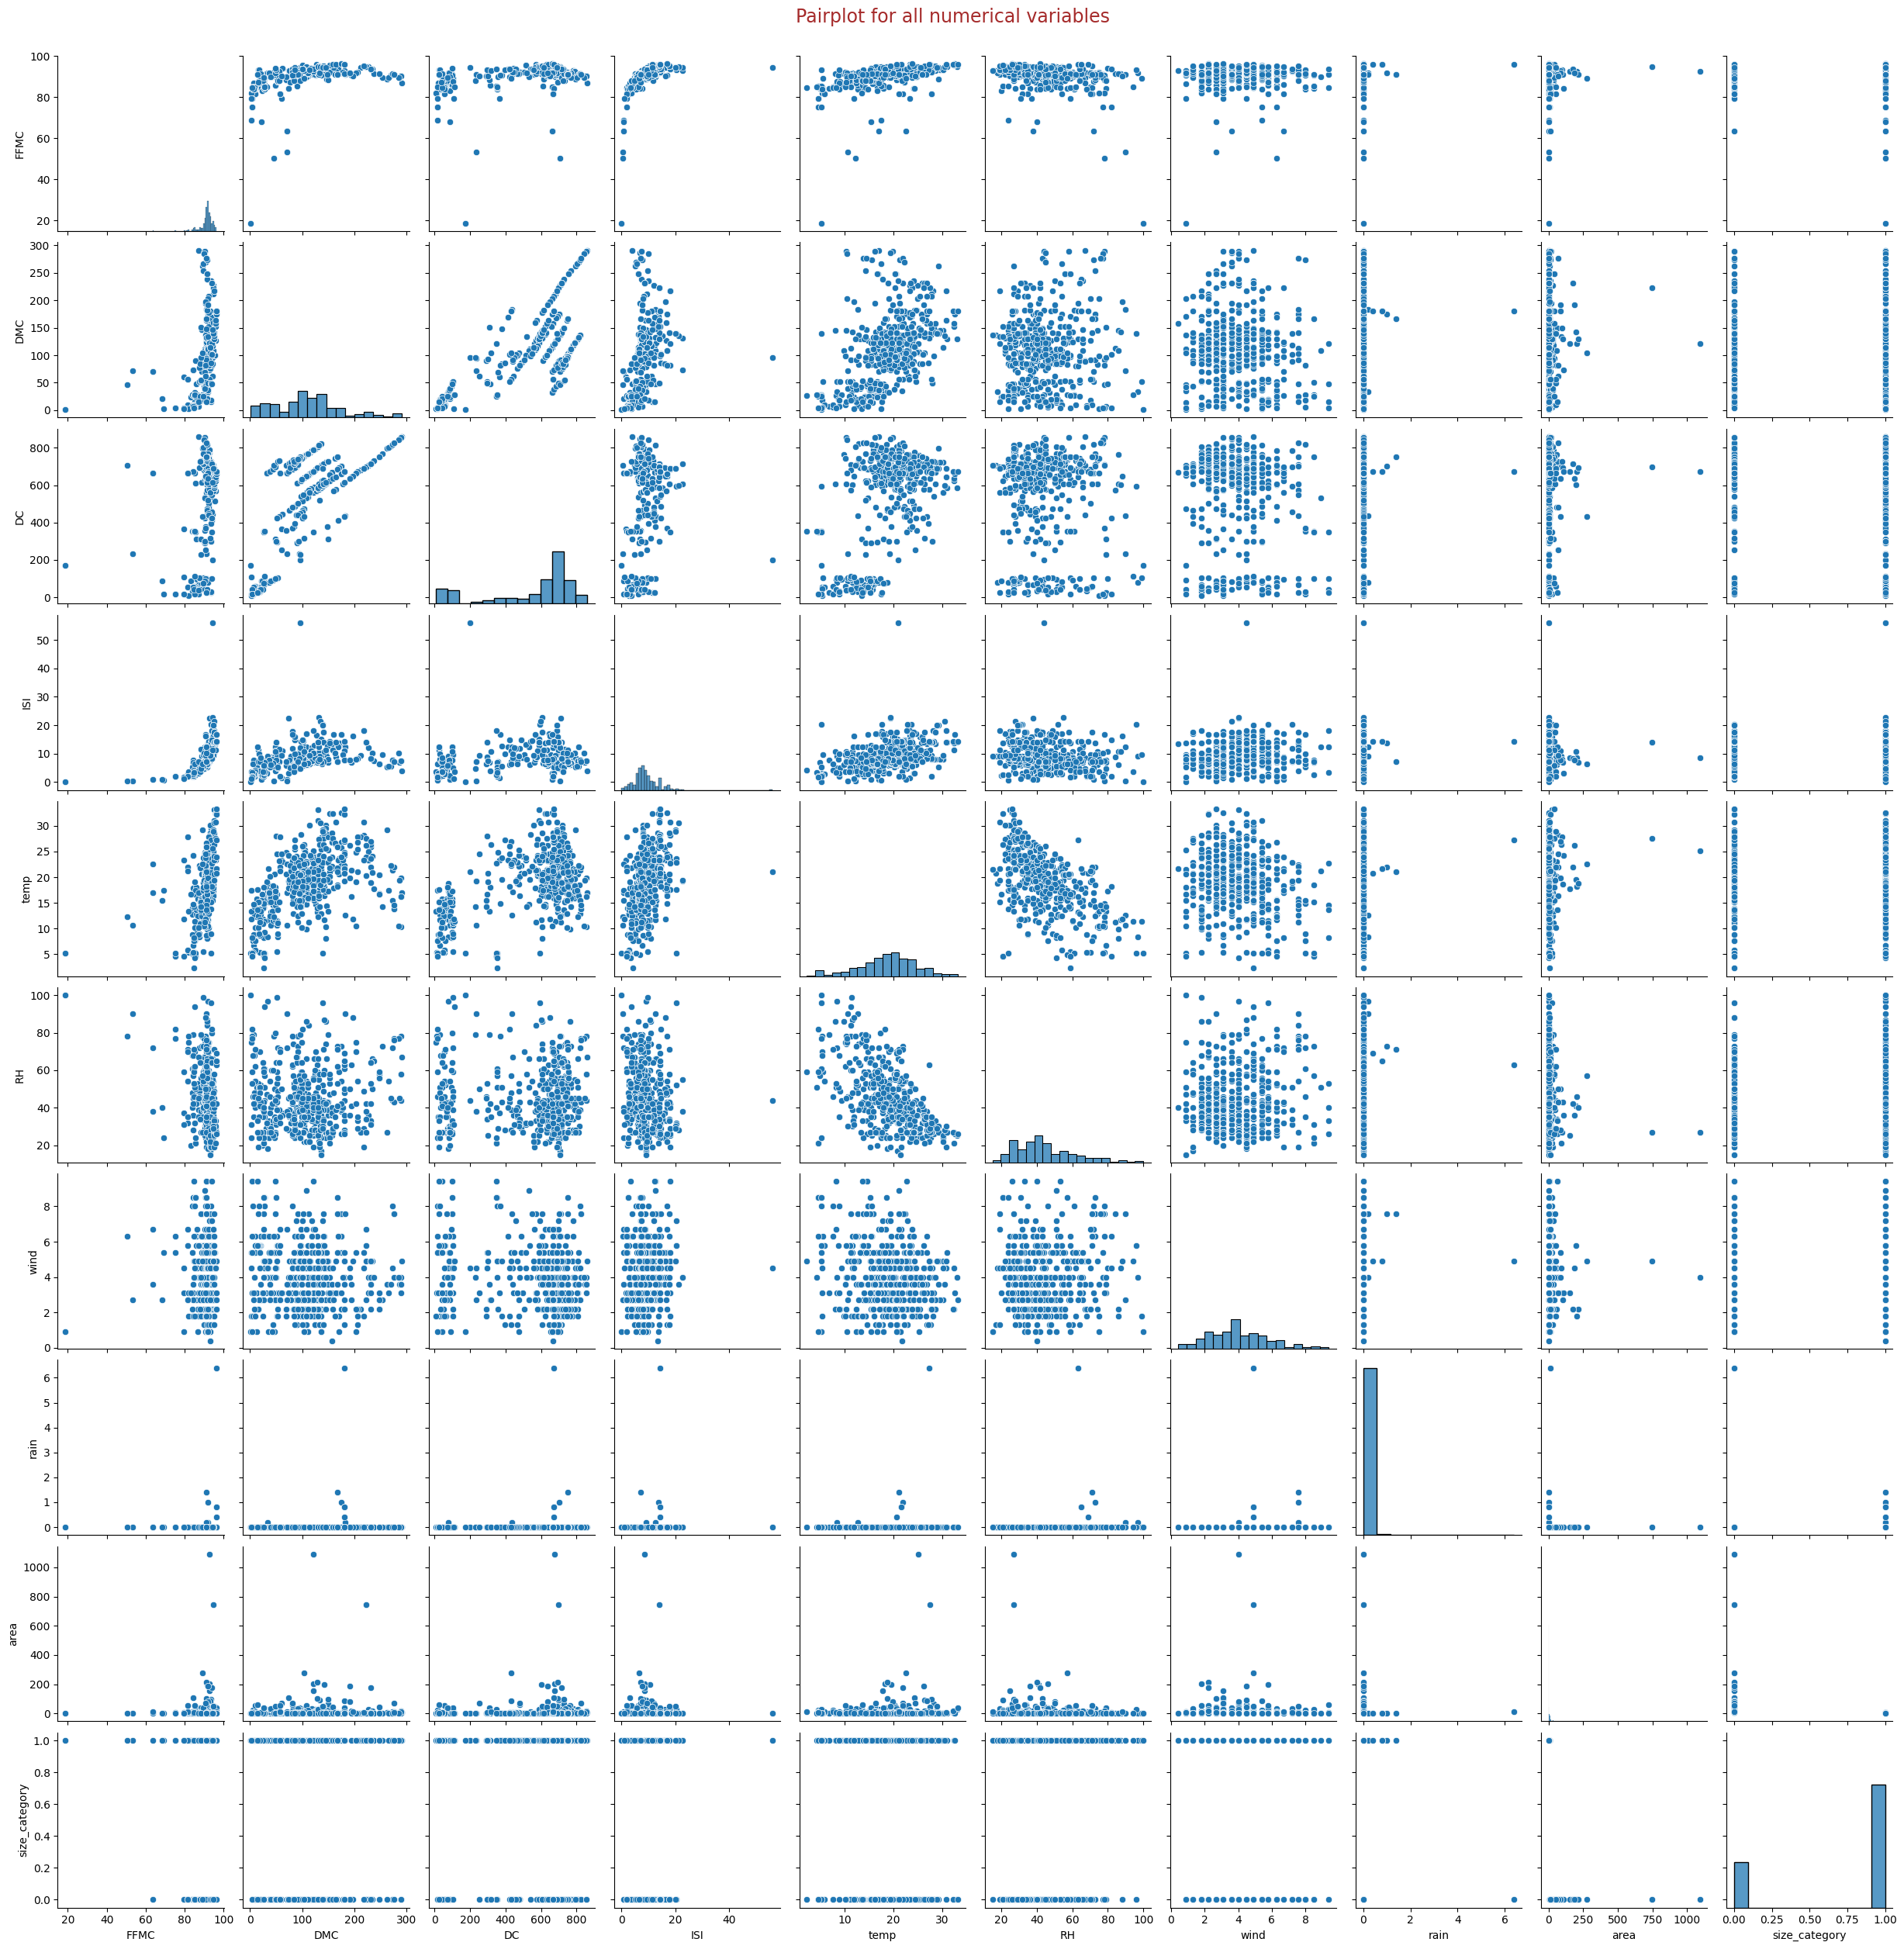

In [45]:
# Pairplot

sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17,color="brown")
plt.show()

# Data Preprocessing

In [46]:
# Drop the unnecessary columns

forestfires.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)


In [47]:
pd.set_option("display.max_columns", 27)


In [48]:
forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [49]:
# Check the outliers

from sklearn.ensemble import IsolationForest
data1=forestfires.copy()

# Training the model

clf=IsolationForest(random_state=10,contamination=.01)
clf.fit(data1)
data1["anamoly"]=clf.predict(data1.iloc[:,0:27])
outliers=data1[data1["anamoly"]==-1]

In [50]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [51]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [52]:
forestfires.drop([281, 299, 379, 463, 464, 469], axis=0, inplace=True)


In [53]:
forestfires.shape

(511, 27)

In [54]:
# Splitting data into target variable and independent variables

x = forestfires.drop('size_category', axis=1)
y = forestfires['size_category']

# Feature Scaling

In [55]:
norm=MinMaxScaler()
std=StandardScaler()

x_norm=pd.DataFrame(norm.fit_transform(x),columns=x.columns)
x_std=pd.DataFrame(std.fit_transform(x),columns=x.columns)

In [56]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.152145,-1.349327,-1.872882,-0.883826,-1.903660,0.439490,1.531449,-0.073700,-0.200487,2.238697,-0.440369,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
1,-0.080103,-1.204539,0.475150,-0.529429,-0.180137,-0.692844,-1.758092,-0.073700,-0.200487,-0.446688,-0.440369,-0.471686,-0.368179,2.716072,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
2,-0.080103,-1.073914,0.547862,-0.529429,-0.778094,-0.692844,-1.531227,-0.073700,-0.200487,-0.446688,2.270821,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
3,0.187908,-1.237588,-1.941509,-0.019983,-1.886073,3.333233,0.000111,0.598809,-0.200487,2.238697,-0.440369,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
4,-0.396842,-0.954306,-1.840611,0.112916,-1.340877,3.459048,-1.247646,-0.073700,-0.200487,-0.446688,-0.440369,2.120053,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302


In [57]:
# Creating train and test data for model validation

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)


In [58]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((383, 26), (128, 26), (383,), (128,))

In [59]:
# Assuming x_train and y_train are your feature and label datasets
# If you're using pandas DataFrames, you may need to adjust accordingly

# Convert labels to appropriate data type and shape
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else np.array(y_train)

# Check for missing values in labels
if np.isnan(np.sum(y_train)):
    raise ValueError("Missing values found in the labels. Please handle them before training the model.")

# Ensure labels have at least two unique classes
if len(np.unique(y_train)) < 2:
    raise ValueError("The dataset should have at least two classes for classification.")

# Check and encode label types if needed
if not np.issubdtype(y_train.dtype, np.number):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)

# Create the SVM classifier
clf = SVC()

# Define the parameter grid
param_grid = {'kernel': ['rbf'], 'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001]}

# Create the GridSearchCV object
grid = GridSearchCV(clf, param_grid, cv=20)

# Fit the model to the data
grid.fit(x_train, y_train)

# Access the best parameters and best model
best_params = grid.best_params_
best_model = grid.best_estimator_

# Print the best parameters and best model
print("Best Parameters:", best_params)
print("Best Model:", best_model)


Best Parameters: {'C': 12, 'kernel': 'rbf'}
Best Model: SVC(C=12)


In [60]:
((grid.best_score_).mean()*100, grid.best_params_)


(83.51315789473685, {'C': 12, 'kernel': 'rbf'})

In [62]:
# Assuming x_train, y_train, x_test, and y_test are your training and testing datasets
# If you're using pandas DataFrames, you may need to adjust accordingly

# Convert labels to appropriate data type and shape
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else np.array(y_train)
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else np.array(y_test)

# Check for missing or unknown values in labels
if np.isnan(np.sum(y_train)) or np.isnan(np.sum(y_test)):
    raise ValueError("Missing values found in the labels. Please handle them before training the model.")

# Ensure labels have at least two unique classes
if len(np.unique(y_train)) < 2 or len(np.unique(y_test)) < 2:
    raise ValueError("Both training and testing datasets should have at least two classes for classification.")

# Check and encode label types if needed
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Ensure that all classes in y_train are present in y_test for consistency
missing_classes = set(np.unique(y_train)) - set(np.unique(y_test))
if missing_classes:
    raise ValueError(f"The following classes are missing in the testing set: {missing_classes}")

# Ensure that all classes in y_test are present in y_train for consistency
missing_classes = set(np.unique(y_test)) - set(np.unique(y_train))
if missing_classes:
    raise ValueError(f"The following classes are missing in the training set: {missing_classes}")

# Create the SVM classifier
clf = SVC(kernel='rbf', C=15, gamma='scale')

# Fit the model to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)

# Make predictions on the training set for accuracy comparison
y_pred_train = clf.predict(x_train)

# Calculate and print accuracy for testing set
acc_test = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy:", acc_test)

# Calculate and print accuracy for training set
acc_train = accuracy_score(y_train, y_pred_train) * 100
print("Train Accuracy:", acc_train)



Test Accuracy: 78.125
Train Accuracy: 95.822454308094


In [63]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12 19]
 [ 9 88]]


In [64]:
clf=SVC(kernel='rbf', C=15, gamma = 'auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 78.125
Train Accuracy = 95.822454308094


array([[12, 19],
       [ 9, 88]])

In [65]:
clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [66]:
((grid.best_score_).mean()*100, grid.best_params_)

(88.47368421052633, {'C': 15, 'degree': 1, 'kernel': 'poly'})

In [67]:
clf_p=SVC(kernel='poly', C=15, degree =1 )
clf_p.fit(x_train, y_train)
y_pred_p = clf_p.predict(x_test)
y_pred1 = clf_p.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred_p)

Test Accuracy  = 78.125
Train Accuracy = 89.03394255874673


array([[14, 17],
       [ 0, 97]])

In [68]:
clf = SVC()
param_grids = [{'kernel':['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['linear']}])

In [69]:
((grid.best_score_).mean()*100, grid.best_params_)

(97.638326585695, {'C': 13, 'kernel': 'linear'})

In [70]:
clf_l=SVC(kernel='linear', C=10)
clf_l.fit(x_train, y_train)
y_pred_l = clf_l.predict(x_test)
acc = accuracy_score(y_pred_l, y_test)*100
y_pred1 = clf_l.predict(x_train)
acc1= accuracy_score(y_pred1, y_train)*100
print("Test Accuracy  =" , acc)
print("Train Accuracy =", acc1)
confusion_matrix(y_test, y_pred_l)

Test Accuracy  = 94.53125
Train Accuracy = 98.9556135770235


array([[25,  6],
       [ 1, 96]])

In [71]:
# It is clearly evident that our linear kernel model of SVC is giving us the highest accuracy.




# Hence we will be using it as our model.